In [2]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# 0. Preprocessing

Nguồn : https://www.kaggle.com/code/sercanyesiloz/fuel-consumption-prediction-xgboost  
Cell code số 2

In [5]:
auto_misspelled = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}
data['company'] = [auto_misspelled[key].title() if key in auto_misspelled else \
               key.title() for key in [i.split()[0] for i in data['car_name']]]

# 1. How many cars and how many attributes are in the data set.

In [6]:
data.shape

(406, 10)

# 2.

In [7]:
#distict car
len(data['car_name'].unique())

312

In [8]:
# best MPG 
data.sort_values(by='mpg', ascending=False).head(1).car_name

329    mazda glc
Name: car_name, dtype: object

In [9]:
data[data['cylinders']==8.0][['company','car_name']].drop_duplicates().groupby('company').count()

,car_name
company,
Amc,7
Buick,6
Cadillac,2
Chevrolet,14
Chrysler,4
Dodge,12
Ford,15
Harvester,1
Mercury,5


In [10]:
## 3-cynlinder
data[data['cylinders']==3.0]['car_name'].drop_duplicates()

78     mazda rx2 coupe
118          maxda rx3
250         mazda rx-4
341      mazda rx-7 gs
Name: car_name, dtype: object

# 3. 

In [11]:
#agg with all columns
data.select_dtypes(include=['int','float']).agg(['count','mean','max','min','std'],missing='drop')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479


array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

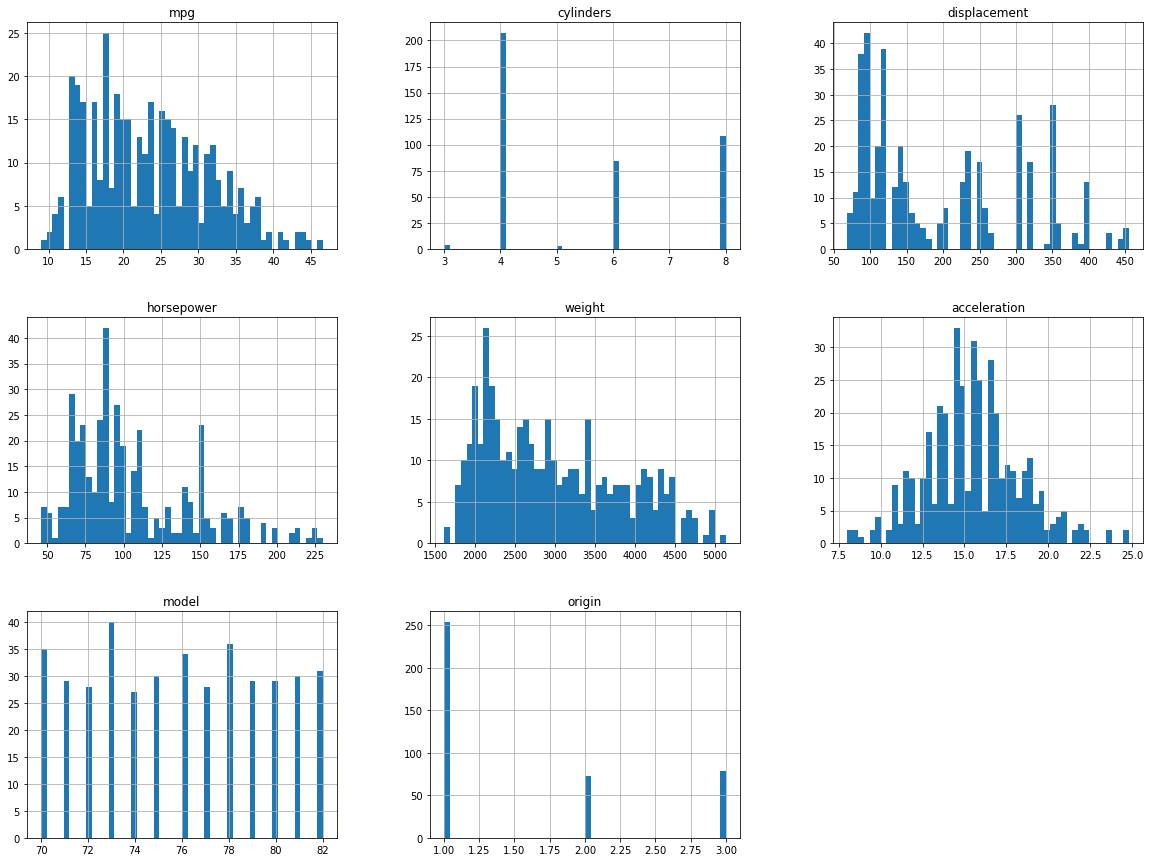

In [12]:
# draw historgram for numerics collumns
data.select_dtypes(include=['int','float']).hist(bins=50, figsize=(20,15))


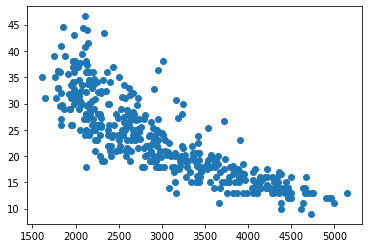

In [13]:
plt.scatter(data['weight'], data['mpg'])

In [14]:
#correlation between weight and mpg
data.corr()['mpg']['weight']

-0.8317409332443344

# 6.

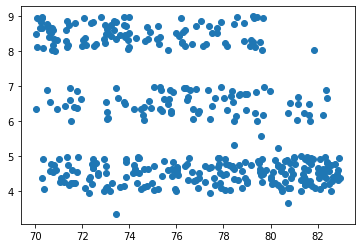

In [15]:
plt.scatter(data['model']+np.random.random(len(data['model'])), data['cylinders']+np.random.random(len(data['cylinders'])))

In [16]:
np.random.normal(data['cylinders'].mean(),data['cylinders'].std())/100

0.059417230029167774

# 7.

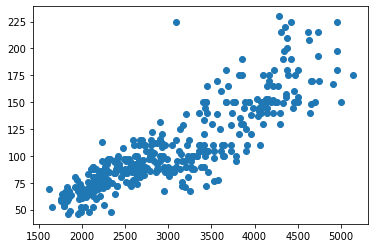

In [17]:
plt.scatter(data['weight'], data['horsepower'])
plt.show()

# 8. 

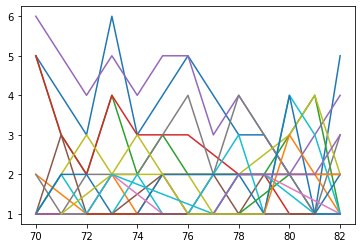

In [18]:
gb_data = data[['car_name','company','model']].groupby(by=['company','model']).agg('count')['car_name']
company_list = data['company'].unique()
#plot time series
for company in company_list:
    plt.plot(gb_data[company],label=company)
    #plt.title(company)
    # plt.show()
#plt.legend(loc="center",bbox_to_anchor=[0.5, 0.5])
plt.show()
#plt.plot(gb_data['chevrolet'],label='chevrolet')

<AxesSubplot:>

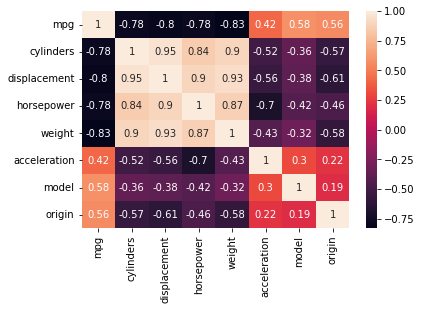

In [25]:
corr = data.corr()
sns.heatmap(corr, annot=True)
